In [19]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import subprocess
%matplotlib inline

In [20]:
def profile(*args):
    str_args = list(map(str, *args))
    s = subprocess.run(["./profile.exe", *str_args], capture_output=True)
    csv = s.stdout.decode()
    df = pd.read_csv(io.StringIO(csv))
    return df


In [21]:
def plot_profile(df, log=True):
    scale = "log" if log else "linear"
    plt.figure(figsize=(8, 6), dpi=80)

    plt.plot(df["n"], df["q"], label="qsort")
    plt.plot(df["n"], df["my"], label="mysort")


    plt.yscale(scale)
    plt.xscale(scale)
    plt.legend()
    plt.xlabel("# elements")
    plt.ylabel("ns")
    plt.plot(figsize=(10, 10))

In [24]:
df = profile([10, 10**2, 10**3, 10**4, 10**5])
df

,n,q,my
0,10,0,1
1,100,6,35
2,1000,121,2377
3,10000,1445,291943
4,100000,14466,22765681


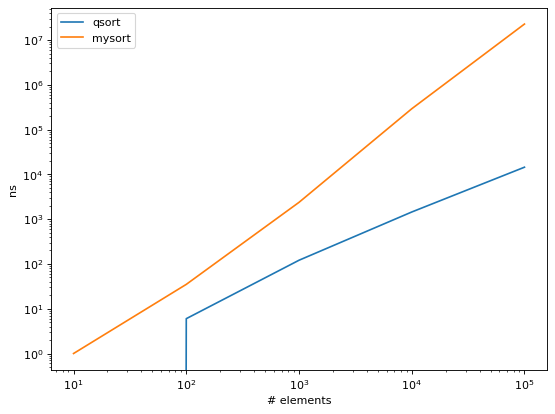

In [27]:
plot_profile(df)

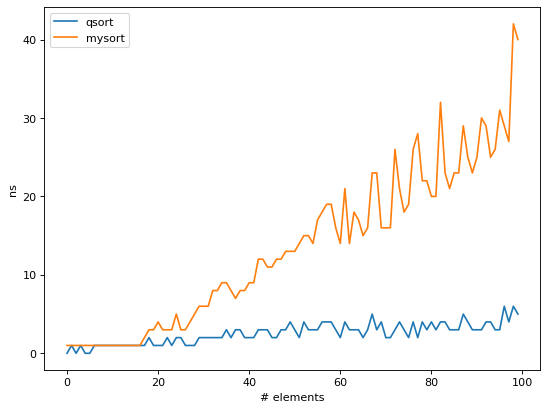

In [23]:
plot_profile(profile(list(range(100))), log=False)